In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
data=pd.read_csv("D://datasets//assignment 6b//train_data.csv")

# data analysis

In [ ]:
data.shape

(614, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# data visualization

<AxesSubplot:>

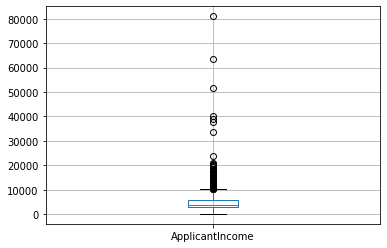

In [ ]:
data.boxplot(column="ApplicantIncome")

there are more outliers in this column

<AxesSubplot:>

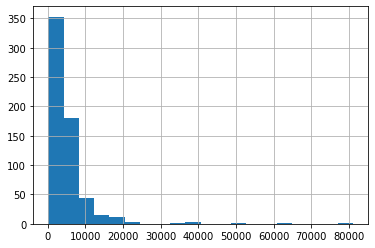

In [ ]:
data["ApplicantIncome"].hist(bins=20)

<AxesSubplot:>

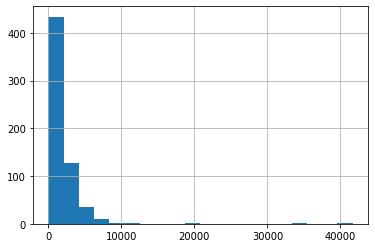

In [ ]:
data["CoapplicantIncome"].hist(bins=20)

as appliciants income its also right skewed


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

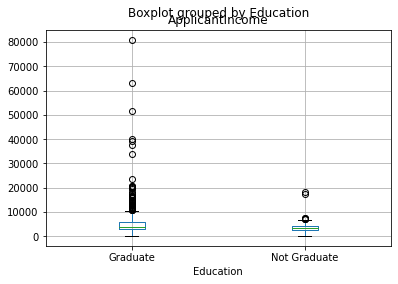

In [ ]:
data.boxplot(column='ApplicantIncome',by="Education")

the median salary does not variate for graduate n not graduate 

<AxesSubplot:>

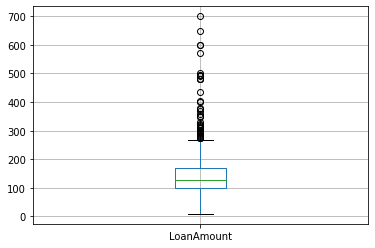

In [ ]:
data.boxplot(column='LoanAmount')

there are more outliers

<AxesSubplot:>

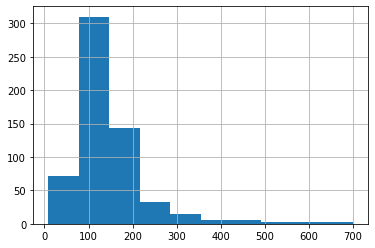

In [ ]:
data["LoanAmount"].hist()

its right skewed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

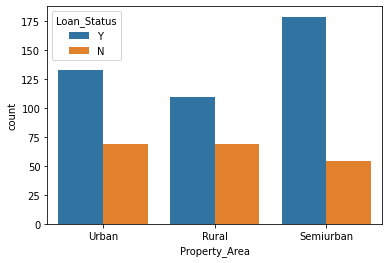

In [ ]:
sns.countplot(x = "Property_Area",hue="Loan_Status",data=data)

<AxesSubplot:>

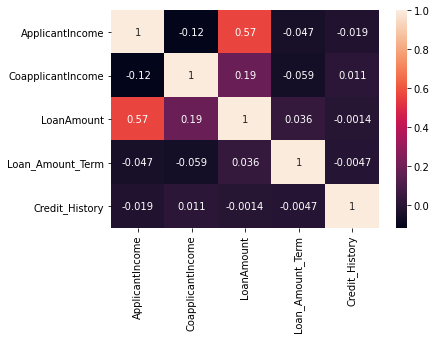

In [ ]:
sns.heatmap(data.corr(),annot = True)

From the plot it is clear that the Loan Status is positively correlated to the credit history with correlation constant of 0.53 which proves that there are more than 50% chances that the person having more income is more likely to get the loans.

<AxesSubplot:xlabel='Gender', ylabel='count'>

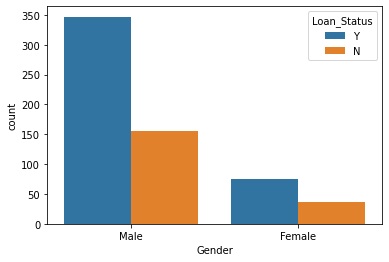

In [ ]:
sns.countplot(x = "Gender",hue="Loan_Status",data=data)

The graph clearly shows that if the person is male than he has more chances of getting loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

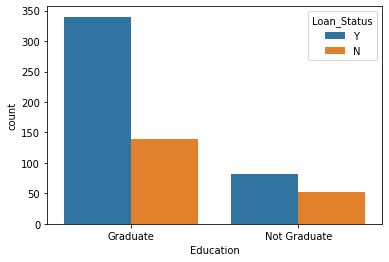

In [ ]:
sns.countplot(x="Education",hue="Loan_Status",data=data)

The graph clearly shows that if the person is grauate than he/she has more chances of getting loan.

<AxesSubplot:xlabel='Married', ylabel='count'>

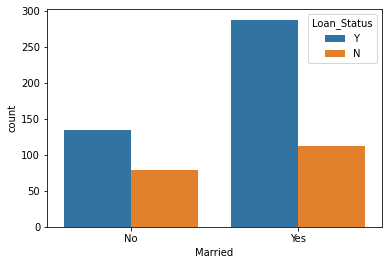

In [ ]:
sns.countplot(x = "Married",hue="Loan_Status",data=data)

The graph clearly shows that if the person is married than he/she has more chances of getting loan.



# data wrangling

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True) 
#hence gender is categorial variable is fill missing values we use mode [0] is to mention the index

In [ ]:
data["Married"].fillna(data["Married"].mode()[0],inplace=True)

In [ ]:
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)

In [ ]:
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)

In [ ]:
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())#hence its not categorial variable we use mean


In [ ]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)

In [ ]:
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data2 = data
data2.replace({"Married":{'No':0.0,'Yes':1.0},"Gender":{'Male':1.0,'Female':0.0},"Self_Employed":{'No':0.0,'Yes':1.0},
            "Property_Area":{"Rural":0.0,"Semiurban":1.0,"Urban":2.0},"Education":{'Graduate':1.0,'Not Graduate':0.0}},
            inplace=True)
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0,1.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0,1.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [ ]:
data2.replace({"Loan_Status":{'N':0.0,'Y':1.0}},inplace=True)
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0,1.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0,1.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [ ]:
data['Dependents']=data['Dependents'].replace('3+', 3)
data2['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
data2['Married'].value_counts()

1.0    401
0.0    213
Name: Married, dtype: int64

In [ ]:
data2['Education'].value_counts()

1.0    480
0.0    134
Name: Education, dtype: int64

In [ ]:
data.drop(['Loan_ID'], axis='columns', inplace=True)

# model

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
array=data.values

In [ ]:
x=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=test_size, random_state=seed)
model = GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[ 32  36]
 [  6 129]]


In [ ]:
from sklearn import metrics
print( " ACCURACY = " ,metrics.accuracy_score(Y_test,predicted))

 ACCURACY =  0.7931034482758621


# test data

In [ ]:
data_test=pd.read_csv("D://datasets//assignment 6b//test_data.csv")

In [ ]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data_test['Dependents']=data_test['Dependents'].replace('3+', 3)
data_test['Dependents'].value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [ ]:
data2_test = data_test
data2_test.replace({"Married":{'No':0.0,'Yes':1.0},"Gender":{'Male':1.0,'Female':0.0},"Self_Employed":{'No':0.0,'Yes':1.0},
            "Property_Area":{"Rural":0.0,"Semiurban":1.0,"Urban":2.0},"Education":{'Graduate':1.0,'Not Graduate':0.0}},
            inplace=True)
data2_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0,1.0,0.0,5720,0,110.0,360.0,1.0,2.0
1,1.0,1.0,1,1.0,0.0,3076,1500,126.0,360.0,1.0,2.0
2,1.0,1.0,2,1.0,0.0,5000,1800,208.0,360.0,1.0,2.0
3,1.0,1.0,2,1.0,0.0,2340,2546,100.0,360.0,1.0,2.0
4,1.0,0.0,0,0.0,0.0,3276,0,78.0,360.0,1.0,2.0


In [ ]:
data_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
data_test["Gender"].fillna(data_test["Gender"].mode()[0],inplace=True) 

In [ ]:
data_test["Married"].fillna(data_test["Married"].mode()[0],inplace=True)

In [ ]:
data_test["Dependents"].fillna(data_test["Dependents"].mode()[0],inplace=True)

In [ ]:
data_test["Self_Employed"].fillna(data_test["Self_Employed"].mode()[0],inplace=True)

In [ ]:
data_test.LoanAmount=data_test.LoanAmount.fillna(data.LoanAmount.mean())

In [ ]:
data_test["Loan_Amount_Term"].fillna(data_test["Loan_Amount_Term"].mode()[0],inplace=True)

In [ ]:
data_test["Credit_History"].fillna(data_test["Credit_History"].mode()[0],inplace=True)

In [ ]:
data_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
data_test['Dependents']=data_test['Dependents'].replace('3+', '3')
data_test['Dependents']=data_test['Dependents'].fillna('0')

In [ ]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.metrics import confusion_matrix
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[ 32  36]
 [  6 129]]
